In [1]:
import pandas as pd
from csvCreator import get_readable_date
import numpy as np

In [2]:
def to_evenly_spaced(df):
    date = df['time'].apply(lambda x: get_readable_date(x))
    df.insert(loc=1, column='date', value=date)
    median = np.trunc(df.groupby('date').size().median())
    df.drop(['date'], axis=1, inplace=True)
    day = np.trunc(len(df.index) / median)
    new_last_index = int(median * day)

    even_time = []
    firs_time = df[['time']].iloc[1].values.item()
    for i in range(len(df.index)):
        even_time.append(firs_time)
        firs_time += 60
    df.drop(['time'], axis=1, inplace=True)
#     df.insert(loc=0, column='time', value=even_time)
    df = df.iloc[:new_last_index]
    return df.drop(['phq_2'], axis=1), df.drop(['phq_1'], axis=1), int(median)

In [3]:
def generator(data, look_b, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + look_b
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + look_b, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + look_b
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           look_b // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - look_b, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, targets


In [6]:
output_path = '/Volumes/hex/ST-1871742707-res/'
p = pd.read_csv(output_path + 'ST-1871742707_1.0.csv')

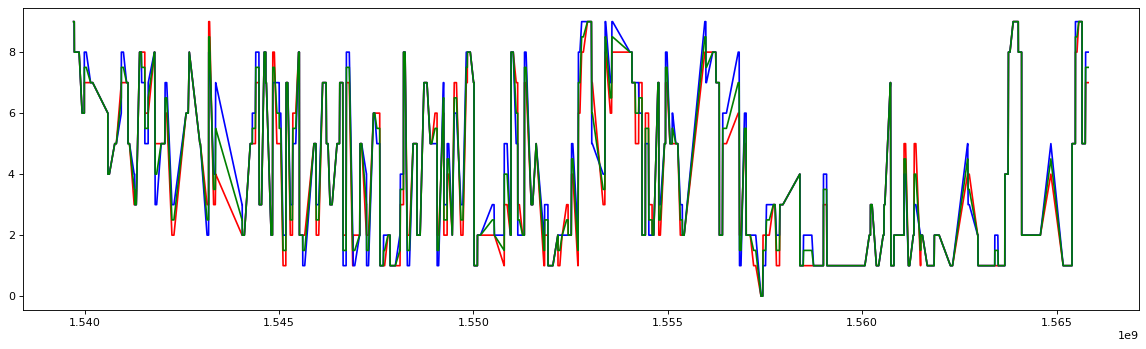

In [7]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p[['time']]
yaxis = p[['phq_1']]
yaxis2 = p[['phq_2']]
avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')
pyplot.plot(xaxis, avg, color='green', label='avg')

In [8]:
p.head()

,time,window,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,...,tired,period,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1,phq_2
0,1539718734,60,2.34,3.52,-2.90,4.19,2.65,4.19,-1.43,82.50,...,3,0,8,23,81,95,0,0,9,9
1,1539718794,60,4.36,4.74,-4.58,3.53,-1.59,3.53,-1.05,77.83,...,3,0,8,23,81,95,0,0,9,9
2,1539718854,60,2.99,5.40,-6.32,4.28,0.48,4.28,-0.50,96.74,...,3,0,8,23,81,95,0,0,9,9
3,1539718914,59,4.92,4.19,-5.86,4.15,0.95,4.15,0.02,80.78,...,3,0,8,23,81,95,0,0,9,9
4,1539718973,60,-6.47,2.59,-6.80,2.64,-1.51,2.64,0.11,27.43,...,3,0,8,23,81,95,0,0,9,9


In [9]:
# drop zero columns (or almost zeros)
p = p.drop(['alc','cig', 'period', 'work_time', 'day_sleep'], axis=1)

In [11]:
# just numerical data
p = p.drop([ 'window'], axis=1)
p_1, p_2, median = to_evenly_spaced(p)

In [12]:
float_data_1 = p_1.to_numpy()
p_1.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,PlethysmogramGreen,ple_std,mood,tense,tired,rumination,socialize,socialize_val,sport_time,phq_1
0,2.34,3.52,-2.90,4.19,2.65,4.19,-1.43,82.50,0.31,41.64,...,2690970.95,542224.77,2,3,3,8,23,81,95,9
1,4.36,4.74,-4.58,3.53,-1.59,3.53,-1.05,77.83,1.89,58.35,...,2369856.16,637598.79,2,3,3,8,23,81,95,9
2,2.99,5.40,-6.32,4.28,0.48,4.28,-0.50,96.74,0.23,65.56,...,2398321.38,442787.83,2,3,3,8,23,81,95,9
3,4.92,4.19,-5.86,4.15,0.95,4.15,0.02,80.78,-1.10,62.23,...,2382646.52,357518.78,2,3,3,8,23,81,95,9
4,-6.47,2.59,-6.80,2.64,-1.51,2.64,0.11,27.43,0.40,16.76,...,2611776.24,123124.10,2,3,3,8,23,81,95,9


In [13]:
float_data_2 = p_2.to_numpy()
p_2.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,PlethysmogramGreen,ple_std,mood,tense,tired,rumination,socialize,socialize_val,sport_time,phq_2
0,2.34,3.52,-2.90,4.19,2.65,4.19,-1.43,82.50,0.31,41.64,...,2690970.95,542224.77,2,3,3,8,23,81,95,9
1,4.36,4.74,-4.58,3.53,-1.59,3.53,-1.05,77.83,1.89,58.35,...,2369856.16,637598.79,2,3,3,8,23,81,95,9
2,2.99,5.40,-6.32,4.28,0.48,4.28,-0.50,96.74,0.23,65.56,...,2398321.38,442787.83,2,3,3,8,23,81,95,9
3,4.92,4.19,-5.86,4.15,0.95,4.15,0.02,80.78,-1.10,62.23,...,2382646.52,357518.78,2,3,3,8,23,81,95,9
4,-6.47,2.59,-6.80,2.64,-1.51,2.64,0.11,27.43,0.40,16.76,...,2611776.24,123124.10,2,3,3,8,23,81,95,9


In [14]:
median

380

In [15]:
# first 200 days as training
mean = float_data_1[:59280].mean(axis=0)
float_data_1 -= mean
std = float_data_1[:59280].std(axis=0)
float_data_1 /= std

In [16]:
# first 200 days as training
mean = float_data_2[:59280].mean(axis=0)
float_data_2 -= mean
std = float_data_2[:59280].std(axis=0)
float_data_2 /= std

In [17]:
float_data_1[0]

array([ 7.44657899e-01,  2.71425284e+00, -1.58818919e-01,  3.30856435e+00,
        2.74372513e-01,  3.30856435e+00, -2.34383201e+00,  4.55958072e+00,
        5.49374911e-01,  3.57831543e+00, -1.49567460e+00,  3.94409133e+00,
       -1.36403217e-01,  4.47991202e+00,  2.17833568e-01,  4.14114795e-01,
       -2.20596633e-01,  2.43046576e+01, -1.86242947e+00,  1.15007575e+01,
        2.17829732e-01,  5.12640508e-01, -2.00047571e-02,  1.49163199e-02,
       -1.47594115e+00, -1.61103874e+00, -1.17276687e+00,  1.31963784e+00,
       -5.38925850e-01,  3.85303601e-01,  3.73332627e+00,  1.97513060e+00])

In [18]:
float_data_2[0]

array([ 7.44657899e-01,  2.71425284e+00, -1.58818919e-01,  3.30856435e+00,
        2.74372513e-01,  3.30856435e+00, -2.34383201e+00,  4.55958072e+00,
        5.49374911e-01,  3.57831543e+00, -1.49567460e+00,  3.94409133e+00,
       -1.36403217e-01,  4.47991202e+00,  2.17833568e-01,  4.14114795e-01,
       -2.20596633e-01,  2.43046576e+01, -1.86242947e+00,  1.15007575e+01,
        2.17829732e-01,  5.12640508e-01, -2.00047571e-02,  1.49163199e-02,
       -1.47594115e+00, -1.61103874e+00, -1.17276687e+00,  1.31963784e+00,
       -5.38925850e-01,  3.85303601e-01,  3.73332627e+00,  1.89699793e+00])

In [28]:
# assume each day got 744 value (average value) that means 17 value per Hour.
# most probably will be 3
# step = 60 / (median / 24)
step = 4
# observations will look back 7 days (average)
look_back = step * 7 * 24
delay = 24 * step

# one day
batch_size = median

In [29]:
batch_size

380

In [30]:
step

4

In [32]:
print (len(p_1))
print (len(p_2))

85880
85880


In [33]:
# for phq-1
train_gen_1 = generator(float_data_1,
                      look_b=look_back,
                      delay=delay,
                      min_index=0,
                      max_index=59280,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen_1 = generator(float_data_1,
                    look_b=look_back,
                    delay=delay,
                    min_index=59281,
                    max_index=74480,
                    step=step,
                    batch_size=batch_size)
test_gen_1 = generator(float_data_1,
                     look_b=look_back,
                     delay=delay,
                     min_index=74481,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)


In [34]:
# for phq-1
train_gen_2 = generator(float_data_2,
                      look_b=look_back,
                      delay=delay,
                      min_index=0,
                      max_index=59280,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen_2 = generator(float_data_2,
                    look_b=look_back,
                    delay=delay,
                    min_index=59281,
                    max_index=74480,
                    step=step,
                    batch_size=batch_size)
test_gen_2 = generator(float_data_2,
                     look_b=look_back,
                     delay=delay,
                     min_index=74481,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

In [41]:
test_steps = (len(p_1.index) - 74480)//batch_size
val_steps = (74480 - 59280)//batch_size
per_epoch =59280//batch_size
per_epoch

156

In [42]:
val_steps 

40

In [43]:
test_steps

30

In [46]:
def evaluate_naive_model(v_gen):
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(v_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

In [47]:
evaluate_naive_model(val_gen_1)

0.8324924891578565


In [48]:
evaluate_naive_model(val_gen_2)

0.8298228097671758


# One GRU layer Model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [50]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data_1.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimzer=RMSprop(), loss='mae')
history = model.fit(train_gen_1,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_1,
                    validation_steps=val_steps)


Train for 156 steps, validate for 40 steps
Epoch 1/20
156/156 [==============================] - 52s 335ms/step - loss: 0.3921 - val_loss: 0.2718
Epoch 2/20
156/156 [==============================] - 54s 345ms/step - loss: 0.2700 - val_loss: 0.2455
Epoch 3/20
156/156 [==============================] - 43s 278ms/step - loss: 0.2541 - val_loss: 0.2388
Epoch 4/20
156/156 [==============================] - 41s 264ms/step - loss: 0.2519 - val_loss: 0.2320
Epoch 5/20
156/156 [==============================] - 41s 261ms/step - loss: 0.2512 - val_loss: 0.2333
Epoch 6/20
156/156 [==============================] - 42s 267ms/step - loss: 0.2482 - val_loss: 0.2240
Epoch 7/20
156/156 [==============================] - 56s 360ms/step - loss: 0.2460 - val_loss: 0.2238
Epoch 8/20
156/156 [==============================] - 42s 267ms/step - loss: 0.2403 - val_loss: 0.2265
Epoch 9/20
156/156 [==============================] - 42s 268ms/step - loss: 0.2411 - val_loss: 0.2227
Epoch 10/20
156/156 [=========

In [51]:
model.save('model_1_707.h5')

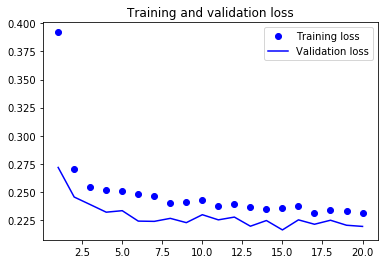

In [52]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [54]:
model.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 2s 81ms/step - loss: 0.1781


0.17814786459008852

# One GRU unit for phq-2

In [55]:
model_1_2 = Sequential()
model_1_2.add(layers.GRU(32, input_shape=(None, float_data_2.shape[-1])))
model_1_2.add(layers.Dense(1))

model_1_2.compile(optimzer=RMSprop(), loss='mae')
history_1_2 = model_1_2.fit(train_gen_2,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_2,
                    validation_steps=val_steps)


Train for 156 steps, validate for 40 steps
Epoch 1/20
156/156 [==============================] - 45s 286ms/step - loss: 0.3489 - val_loss: 0.2830
Epoch 2/20
156/156 [==============================] - 45s 287ms/step - loss: 0.2687 - val_loss: 0.2502
Epoch 3/20
156/156 [==============================] - 41s 263ms/step - loss: 0.2572 - val_loss: 0.2421
Epoch 4/20
156/156 [==============================] - 41s 260ms/step - loss: 0.2568 - val_loss: 0.2331
Epoch 5/20
156/156 [==============================] - 41s 262ms/step - loss: 0.2493 - val_loss: 0.2228
Epoch 6/20
156/156 [==============================] - 41s 263ms/step - loss: 0.2490 - val_loss: 0.2254
Epoch 7/20
156/156 [==============================] - 40s 254ms/step - loss: 0.2469 - val_loss: 0.2205
Epoch 8/20
156/156 [==============================] - 40s 258ms/step - loss: 0.2482 - val_loss: 0.2266
Epoch 9/20
156/156 [==============================] - 40s 258ms/step - loss: 0.2454 - val_loss: 0.2179
Epoch 10/20
156/156 [=========

In [56]:
model.save('model_1_2_770.h5')

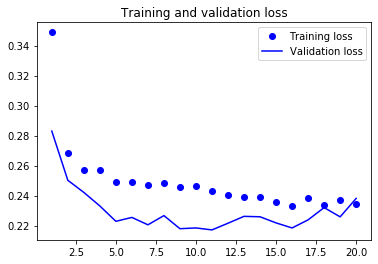

In [57]:
loss = history_1_2.history['loss']
val_loss = history_1_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [58]:
model_1_2.evaluate(test_gen_2, steps=30)

30/30 [==============================] - 3s 84ms/step - loss: 0.2126


0.2126183391859134

# 1D convenet

In [60]:
model_2 = Sequential()
model_2.add(layers.Conv1D(32, 5, activation='relu',
                            input_shape=(None, float_data_1.shape[-1])))
model_2.add(layers.MaxPooling1D(3))
model_2.add(layers.Conv1D(32, 5, activation='relu'))
model_2.add(layers.MaxPooling1D(3))
model_2.add(layers.Conv1D(32, 5, activation='relu'))
model_2.add(layers.GlobalMaxPooling1D())
model_2.add(layers.Dense(1))

model_2.compile(optimizer=RMSprop(), loss='mae')
history_2 = model_2.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Train for 156 steps, validate for 40 steps
Epoch 1/20
156/156 [==============================] - 16s 103ms/step - loss: 0.5537 - val_loss: 0.5655
Epoch 2/20
156/156 [==============================] - 16s 103ms/step - loss: 0.3796 - val_loss: 0.7794
Epoch 3/20
156/156 [==============================] - 17s 108ms/step - loss: 0.3155 - val_loss: 0.7079
Epoch 4/20
156/156 [==============================] - 17s 107ms/step - loss: 0.2766 - val_loss: 0.7509
Epoch 5/20
156/156 [==============================] - 17s 106ms/step - loss: 0.2510 - val_loss: 0.8058
Epoch 6/20
156/156 [==============================] - 17s 110ms/step - loss: 0.2314 - val_loss: 0.7585
Epoch 7/20
156/156 [==============================] - 17s 106ms/step - loss: 0.2181 - val_loss: 0.7665
Epoch 8/20
156/156 [==============================] - 16s 105ms/step - loss: 0.2040 - val_loss: 0.7647
Epoch 9/20
156/156 [==============================] - 16s 106ms/step - loss: 0.1931 - val_loss: 0.7925
Epoch 10/20
156/156 [=========

In [61]:
model_2.save('model_2_770.h5') 

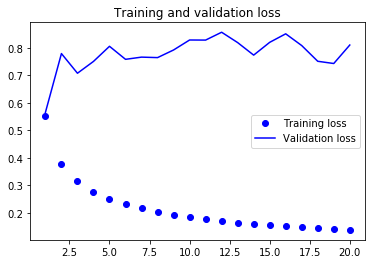

In [62]:
import matplotlib.pyplot as plt
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [57]:
model_2.evaluate(test_gen, steps=30)

30/30 [==============================] - 3s 89ms/step - loss: 0.3324


0.3323956700662772

# 1D convnet and GRU model

In [63]:

model_3 = Sequential()
model_3.add(layers.Conv1D(32, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_3.add(layers.MaxPooling1D(3))
model_3.add(layers.Conv1D(32, 5, activation='relu'))
model_3.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.3))
model_3.add(layers.Dense(1))

model_3.summary()
model_3.compile(optimizer=RMSprop(), loss='mae')
history_3 = model_3.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 16,673
Trainable params: 16,673
Non-trainable params: 0
_________________________________________________________________
Train for 156 steps, validate for 40 steps
Epoch 1/20
156/156 [==============================] - 34s 220ms/step - lo

In [64]:
model_3.save('model_3_770.h5') 

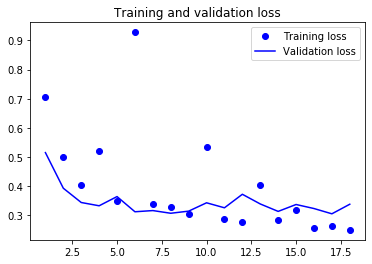

In [69]:
loss = history_3.history['loss'][1:-1]
val_loss = history_3.history['val_loss'][1:-1]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [67]:
model_3.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 2s 62ms/step - loss: 0.3562


0.35619169076283774

In [70]:
model_7 = Sequential()
model_7.add(layers.Conv1D(32, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_7.add(layers.MaxPooling1D(3))
model_7.add(layers.Conv1D(32, 5, activation='relu'))
model_7.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2))
model_7.add(layers.Dense(1))

model_7.summary()
model_7.compile(optimizer=RMSprop(), loss='mae')
history_7 = model_7.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=10,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 16,673
Trainable params: 16,673
Non-trainable params: 0
_________________________________________________________________
Train for 156 steps, validate for 40 steps
Epoch 1/10
156/156 [==============================] - 41s 265ms/step - lo

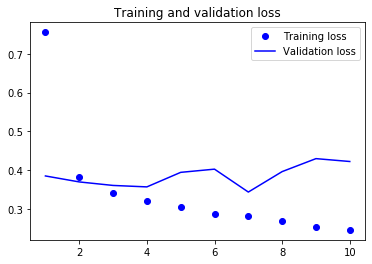

In [71]:
loss = history_7.history['loss']
val_loss = history_7.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [130]:
model_7.evaluate(test_gen, steps=30)

30/30 [==============================] - 4s 129ms/step - loss: 0.1921


0.19211864272753398

# One GRU layer with recurrent dropout

In [74]:
model_4 = Sequential()
model_4.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.1,
                     input_shape=(None, float_data_1.shape[-1])))
model_4.add(layers.Dense(1))

model_4.compile(optimizer=RMSprop(), loss='mae')
history_4 = model_4.fit(train_gen_1,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_1,
                    validation_steps=val_steps)


Train for 156 steps, validate for 40 steps
Epoch 1/20
156/156 [==============================] - 58s 372ms/step - loss: 63.4092 - val_loss: 0.8784
Epoch 2/20
156/156 [==============================] - 62s 395ms/step - loss: 12.5011 - val_loss: 0.3795
Epoch 3/20
156/156 [==============================] - 53s 337ms/step - loss: 0.5386 - val_loss: 0.3195
Epoch 4/20
156/156 [==============================] - 54s 344ms/step - loss: 0.5486 - val_loss: 0.2976
Epoch 5/20
156/156 [==============================] - 56s 357ms/step - loss: 0.3430 - val_loss: 0.2783
Epoch 6/20
156/156 [==============================] - 55s 353ms/step - loss: 0.5463 - val_loss: 0.2575
Epoch 7/20
156/156 [==============================] - 59s 378ms/step - loss: 0.6637 - val_loss: 0.2563
Epoch 8/20
156/156 [==============================] - 54s 348ms/step - loss: 0.3263 - val_loss: 0.2520
Epoch 9/20
156/156 [==============================] - 55s 354ms/step - loss: 0.4474 - val_loss: 0.2494
Epoch 10/20
156/156 [=======

In [75]:
model_4.save('model_4_707.h5') 

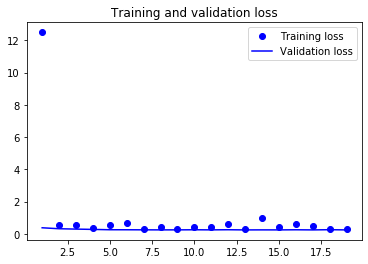

In [77]:
loss = history_4.history['loss'][1:]
val_loss = history_4.history['val_loss'][1:]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

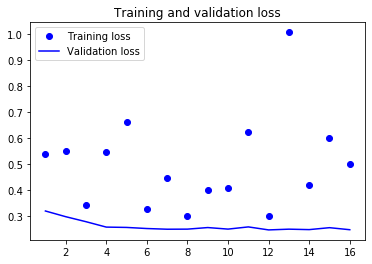

In [78]:
loss = history_4.history['loss'][2:-2]
val_loss = history_4.history['val_loss'][2:-2]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [80]:
model_4.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 3s 93ms/step - loss: 0.2148


0.21478499496976536

In [82]:
model_5 = Sequential()
model_5.add(layers.Conv1D(64, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_5.add(layers.MaxPooling1D(3))
model_5.add(layers.Conv1D(64, 5, activation='relu'))
model_5.add(layers.GRU(64, dropout=0.1, recurrent_dropout=0.2))
model_5.add(layers.Dense(1))

model_5.summary()
model_5.compile(optimizer=RMSprop(), loss='mae')
history_5 = model_5.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, None, 64)          10304     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, None, 64)          20544     
_________________________________________________________________
gru_7 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 55,873
Trainable params: 55,873
Non-trainable params: 0
_________________________________________________________________
Train for 156 steps, validate for 40 steps
Epoch 1/20
156/156 [==============================] - 60s 382ms/step - l

In [83]:
model_5.save('model_5_770.h5') 

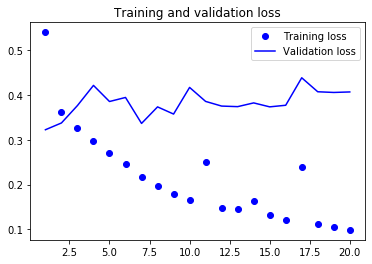

In [84]:
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [85]:
model_5.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 3s 94ms/step - loss: 0.3845


0.38452624101191757

In [96]:
from tensorflow.keras.optimizers import Adam

model_6 = Sequential()
model_6.add(layers.LSTM(30,input_shape=(None, float_data_1.shape[-1])))
model_6.add(layers.Dense(1, activation='linear'))

model_6.summary()
model_6.compile(optimizer=Adam(lr=0.001), loss='mse')
history_6 = model_6.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30)                7560      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 7,591
Trainable params: 7,591
Non-trainable params: 0
_________________________________________________________________
Train for 156 steps, validate for 40 steps
Epoch 1/20
156/156 [==============================] - 81s 516ms/step - loss: 0.3558 - val_loss: 0.3167
Epoch 2/20
156/156 [==============================] - 60s 384ms/step - loss: 0.2056 - val_loss: 0.4160
Epoch 3/20
156/156 [==============================] - 58s 371ms/step - loss: 0.1178 - val_loss: 0.4788
Epoch 4/20
156/156 [==============================] - 61s 389ms/step - loss: 0.0793 - val_loss: 0.4965
Epoch 5/20
156/156 [==============================] - 55s 

KeyboardInterrupt: 

In [88]:
model_5.save('model_6_770.h5') 

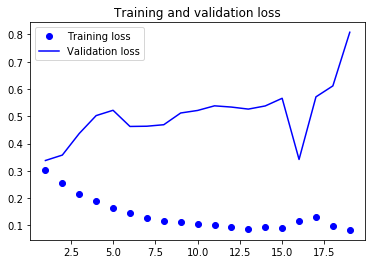

In [95]:
loss = history_6.history['loss'][1:]
val_loss = history_6.history['val_loss'][1:]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [90]:
model_6.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 2s 72ms/step - loss: 1.3153


1.3153438044711947